In [1]:
import pandas as pd

# fetch data
df = pd.read_csv('./data/Case_Studies/Case_04_ChildTrauma._Data.csv', sep=' ');
#df.head()

In [2]:
# create dummy variables
df['black'] = [int(race == 'black') for race in df['race']];
df['hispanic'] = [int(race == 'hispanic') for race in df['race']];
df['white'] = [int(race == 'white') for race in df['race']];
df['other'] = [int(race == 'other') for race in df['race']];

# drop race column
df.drop(columns='race', inplace=True);
#df.head()

In [3]:
trauma_type = df['traumatype'];
df.drop(columns='traumatype', inplace=True);
#df.head()

In [4]:
import numpy as np
from sklearn.preprocessing import scale

def normalize(arr):
    x = np.array(arr);
    return (x - min(x))/(max(x) - min(x));

X = np.apply_along_axis(normalize, axis=1, arr=df);
#X

In [5]:
from sklearn.cluster import KMeans

# train the model
cluster_model = KMeans(n_clusters=6, random_state=1234);
cluster_model.fit_transform(X);

cluster_pred = cluster_model.predict(X);

cluster_pred.shape

(1000,)

In [8]:
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding, MDS

# cluster the data

manifold_model = MDS();
clustering2D = manifold_model.fit_transform(X);

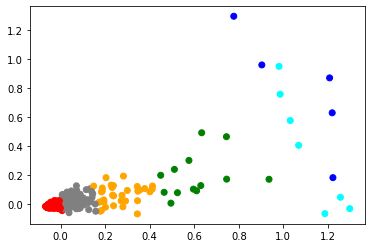

In [9]:
import matplotlib.pyplot as plt

plot_colors = {
    -1: 'purple',
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'orange',
    4: 'cyan',
    5: 'gray'
}

colors = [plot_colors[point] for point in cluster_pred];

plt.scatter(clustering2D[:,0], clustering2D[:,1], c=colors);
plt.show();